In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-11 PYTHON_ML_CLUSTERING_PROJECT_CARDIAC_ARREST_ANALYSIS

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-11 PYTHON_ML_CLUSTERING_PROJECT_CARDIAC_ARREST_ANALYSIS


# Part-1: Data Exploration and Pre-processing

In [126]:
# 1. Load dataset
df = pd.read_csv("Python_Clustering_Pr.csv")

In [4]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [5]:
# 2. Check null values
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [6]:
# 3. Print information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [7]:
# 4. Describe dataset in statistic form
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
# 5. Drop under risk column
df.drop(["UnderRisk"],axis=1,inplace=True)

In [9]:
df.shape

(889, 12)

# Part-2: Working with Models


In [139]:
# 1. Apply Kmean clustering on dataset
# model=KMeans(n_clusters=3)
model=KMeans(n_clusters=10)

In [140]:
model.fit(df)

KMeans(n_clusters=10)

In [141]:
y_predicted=model.fit_predict(df)
y_predicted

array([7, 0, 0, 0, 3, 1, 6, 1, 0, 6, 9, 0, 8, 0, 0, 0, 1, 4, 8, 0, 0, 0,
       2, 1, 0, 8, 2, 6, 0, 2, 1, 2, 1, 4, 1, 0, 4, 1, 0, 0, 0, 1, 8, 1,
       2, 1, 1, 0, 9, 3, 8, 8, 0, 1, 0, 0, 4, 4, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 7, 1, 0, 2, 0, 0, 2, 7, 0, 0, 7, 7, 5, 1, 6, 0, 1, 0, 7,
       8, 0, 8, 9, 8, 0, 0, 0, 8, 0, 2, 9, 0, 0, 8, 0, 0, 2, 0, 1, 1, 2,
       7, 0, 2, 0, 4, 1, 1, 0, 1, 6, 3, 8, 0, 1, 6, 0, 5, 8, 8, 1, 8, 0,
       8, 0, 0, 8, 1, 1, 2, 2, 8, 0, 0, 1, 1, 9, 0, 7, 3, 0, 7, 0, 4, 1,
       0, 2, 2, 0, 0, 0, 0, 7, 6, 8, 0, 1, 1, 1, 6, 2, 0, 5, 0, 4, 0, 4,
       0, 7, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 7, 1, 0, 0, 8, 1, 0, 0, 8, 8,
       2, 0, 1, 1, 7, 1, 1, 2, 8, 0, 1, 0, 4, 1, 0, 0, 8, 0, 1, 4, 0, 9,
       8, 0, 0, 3, 0, 0, 0, 5, 8, 8, 0, 0, 2, 2, 0, 9, 3, 8, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 9, 1, 0, 6, 0, 0, 8, 0, 1, 7, 0, 8, 0, 4, 0, 0,
       0, 7, 1, 2, 8, 1, 8, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 9, 7, 0, 6, 0,
       0, 5, 5, 1, 1, 0, 0, 0, 4, 1, 4, 8, 1, 2, 2,

In [142]:
# 2. Print cluster centers
model.cluster_centers_

array([[ 1.00308642e+00,  1.11022302e-16,  9.84567901e-01,
         9.71445147e-17,  9.96913580e-01,  9.25925926e-03,
        -3.46944695e-17,  3.08641975e-03,  1.00000000e+00,
         2.77555756e-17,  4.32098765e-02, -1.38777878e-17,
         1.00000000e+00],
       [ 2.00000000e+00, -9.71445147e-17,  1.00000000e+00,
         6.93889390e-17,  1.00000000e+00,  3.66492147e-02,
        -2.77555756e-17, -1.38777878e-17,  9.79057592e-01,
        -1.04083409e-17, -1.38777878e-17,  2.08166817e-17,
         5.00000000e+00],
       [ 1.14285714e+00,  1.90476190e-01,  6.98412698e-01,
         1.00000000e+00,  1.00000000e+00,  1.38777878e-17,
        -1.38777878e-17,  0.00000000e+00,  1.00000000e+00,
        -6.93889390e-18, -6.93889390e-18, -6.93889390e-18,
         8.00000000e+00],
       [ 1.02702703e+00,  1.08108108e-01,  2.16216216e-01,
         2.70270270e-02,  0.00000000e+00,  8.10810811e-02,
         1.00000000e+00,  1.00000000e+00,  8.10810811e-02,
        -3.46944695e-18, -3.46944695e

In [143]:
# 3. Create column cluster for predicted labels value
df["cluster"]=y_predicted

In [144]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,label,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,2,7
1,1,0,1,0,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,1,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,1,0,0,0,0,6,3


In [87]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
df6=df[df.cluster==5]
df7=df[df.cluster==6]
df8=df[df.cluster==7]
df9=df[df.cluster==8]
df10=df[df.cluster==9]

In [17]:
df1.shape

(601, 13)

In [18]:
df2.shape

(251, 13)

In [19]:
df2

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
5,2,0,1,0,1,0,0,0,1,0,0,0,1
7,2,0,1,0,1,0,0,0,1,0,0,0,1
11,2,0,1,0,1,0,0,0,1,0,1,0,1
16,2,0,1,0,1,0,0,0,1,0,0,0,1
23,2,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,2,0,0,0,1,0,0,0,0,0,0,0,1
879,2,1,0,0,1,0,0,0,0,0,0,0,1
883,2,0,1,0,1,0,0,0,1,0,0,0,1
884,2,0,1,0,1,0,0,0,1,0,0,0,1


In [65]:
df3.shape

(123, 13)

In [22]:
# df4.shape

In [21]:
# df5.shape

In [100]:
plt.rcParams['figure.figsize']=(30,8)

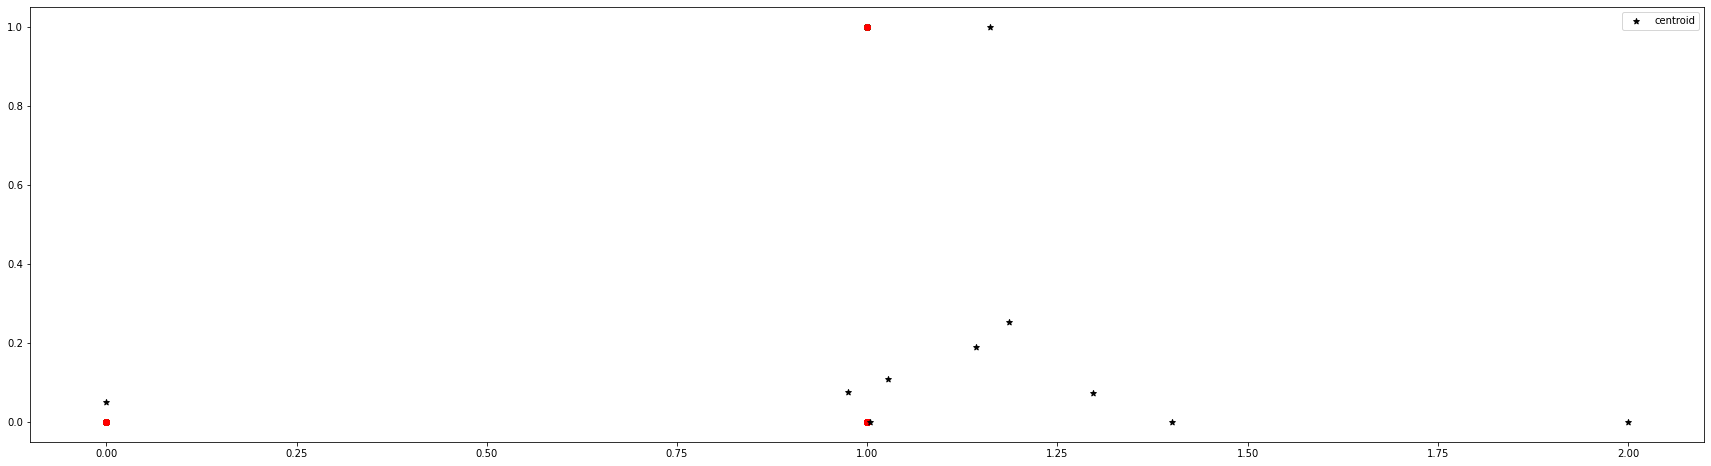

In [145]:
plt.scatter(df1.Family_history,df1.CABG_history,color='blue')
plt.scatter(df2.Family_history,df2.CABG_history,color='green')
plt.scatter(df3.Family_history,df3.CABG_history,color='red')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [147]:
# 8. Show a silhouette score
from sklearn.metrics import silhouette_score

In [146]:
silhouette_score(df,y_predicted)

0.8734100819459032

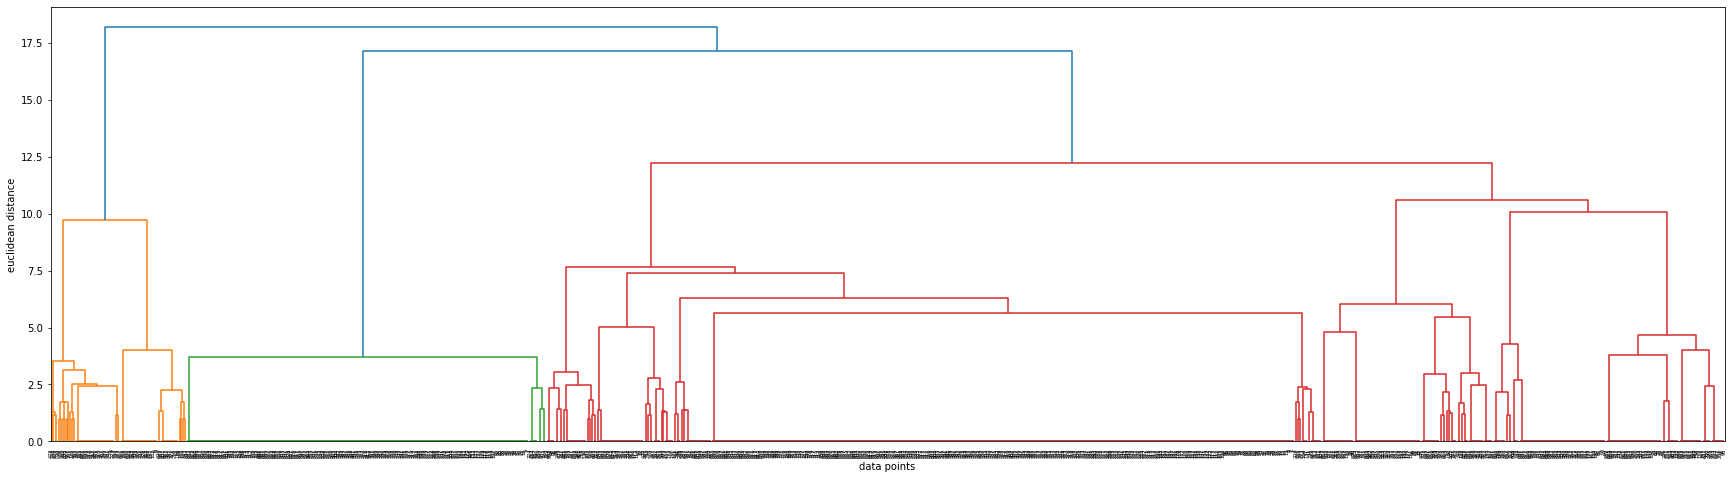

In [129]:
# 4. Plot the hierarchical clustering using scipy
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [130]:
# 5. Apply Agglomerative Clustering using number of clusters
from sklearn.cluster import AgglomerativeClustering

In [131]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = "euclidean", linkage = "ward")

In [132]:
cluster = hc.fit_predict(df)
cluster

array([2, 1, 1, 1, 6, 5, 4, 5, 1, 4, 7, 1, 0, 1, 1, 1, 5, 3, 0, 1, 1, 1,
       8, 5, 1, 0, 8, 4, 1, 8, 5, 8, 5, 3, 5, 1, 3, 5, 1, 1, 1, 5, 0, 5,
       8, 5, 5, 1, 7, 6, 0, 0, 1, 5, 1, 1, 3, 3, 5, 1, 5, 8, 1, 1, 1, 1,
       1, 8, 1, 2, 5, 1, 8, 1, 1, 8, 2, 1, 1, 2, 2, 9, 5, 4, 1, 5, 1, 2,
       0, 1, 0, 7, 0, 1, 1, 1, 0, 1, 8, 7, 1, 1, 0, 1, 1, 8, 1, 5, 5, 8,
       2, 1, 8, 1, 3, 5, 5, 1, 5, 4, 6, 0, 1, 5, 4, 1, 9, 0, 0, 5, 0, 1,
       0, 1, 1, 0, 5, 5, 8, 8, 0, 1, 1, 5, 5, 7, 1, 2, 6, 1, 2, 1, 3, 5,
       1, 8, 8, 1, 1, 1, 1, 2, 4, 0, 1, 5, 5, 5, 4, 8, 1, 9, 1, 3, 1, 3,
       1, 2, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 2, 5, 1, 1, 0, 5, 1, 1, 0, 0,
       8, 1, 5, 5, 2, 5, 5, 8, 0, 1, 5, 1, 3, 5, 1, 1, 0, 1, 5, 3, 1, 7,
       0, 1, 1, 6, 1, 1, 1, 9, 0, 0, 1, 1, 8, 8, 1, 7, 6, 0, 5, 1, 1, 5,
       5, 1, 1, 1, 1, 1, 7, 5, 1, 4, 1, 1, 0, 1, 5, 2, 1, 0, 1, 3, 1, 1,
       1, 2, 5, 8, 0, 5, 0, 1, 5, 1, 1, 5, 1, 5, 1, 5, 1, 7, 2, 1, 4, 1,
       1, 9, 9, 5, 5, 1, 1, 1, 3, 5, 3, 0, 5, 8, 8,

In [133]:
# 6. Create label column for predicted cluster label
df['label']=cluster

In [134]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,label
0,1,1,1,0,1,0,0,0,1,0,0,0,2
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,6


In [135]:
# 7. Show label counts.
df['label'].value_counts()

1    324
5    191
0     91
8     63
2     60
3     41
6     37
4     35
7     27
9     20
Name: label, dtype: int64

# For Hierarchical

In [137]:
silhouette_score(df,cluster)

0.7815451312127419